## Erschließungsstrategien für unbekannten Wortschatz von DaF-Lernenden an spanischen Universitäten (2017-19)
# Datenanalyse - Variablen

##### Werkzeuge und Daten importieren

In [1]:
from funktionen import *
import pandas as pd
import matplotlib
import numpy as np
import scipy as sp
import math
from scipy import stats
from sklearn import tree
import seaborn as sns
sns.set(style="whitegrid") #"white", "darkgrid"...
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
Daten1 = pd.read_pickle('D:\Daten\DISS\Daten\Estrategias_Estudiantes_2017-19_ber')

In [3]:
Daten1.shape

(401, 377)

In [4]:
#Daten.head(3)

In [5]:
gloss = pd.read_pickle('D:\Daten\DISS\Daten\Gloss2018')

Nur vollständige Befragungen sollen berücksichtigt werden:

In [6]:
Daten = Daten1[Daten1['Finished']==1].reset_index(drop=True)

Listen erstellen:

In [7]:
Liste_A_Q2 = [col for col in Daten.columns if 'A-Q2' in col]

In [8]:
Liste_A_Q3 = [col for col in Daten.columns if 'A-Q3' in col]
Liste_A_Q3.pop(3)

'A-Q3_3_TEXT'

In [9]:
Liste_C_Q1 = [col for col in Daten.columns if 'C-Q1' in col]

### Unabhängige Variablen

##### Studium und Studienrichtung im Bachelorstudium/Grado

Zunächst werden die Fragen nach aktuellem Studium (D-Q2) und nach Studienrichtung im Fall des Bachelorstudiums/Grado (D-Q2a) auf fehlende Werte oder falsche Zuordnung überprüft. Fehlende oder fehlerhafte Werte können korrigiert werden, wenn die Intention der Befragten klar ersichtlich ist.

*Studium:*

In [10]:
Daten['D-Q2'].value_counts()

1    360
2     12
4     10
3      6
0      2
Name: D-Q2, dtype: int64

In [11]:
Daten[Daten['D-Q2']==4]['D-Q2_4_TEXT']

120    Ya he terminado mis estudios, actualmente trab...
135                                              Postdoc
138                                              Trabajo
156                          Personal Administrativo UAM
164                                              Erasmus
171                                                    0
200                                   No estudio carrera
222                                   Escuela de Idiomas
230                                            aleman a2
347                                   Estudios alemanes 
Name: D-Q2_4_TEXT, dtype: object

Bei der Person, die "Estudios alemanes" angegeben hat, ist nicht klar, ob sie sich auf das gleichnamige Bachelorstudium oder einen Sprachkurs bezieht, daher wird keine Rekodierung vorgenommen.

Die fehlenden Werte können mit "4" (Andere) rekodiert werden.

In [12]:
Daten.loc[Daten['D-Q2']==0,'D-Q2'] = 4

In [13]:
Daten['D-Q2'].value_counts()

1    360
4     12
2     12
3      6
Name: D-Q2, dtype: int64

In [14]:
Daten[Daten['D-Q2']!=1]['D-Q4'].value_counts()

5    8
3    7
4    5
1    5
2    3
6    2
Name: D-Q4, dtype: int64

Da für die Kategorien "Masterstudium", "Doktorat" und "Andere" jeweils nur wenige TN-Zahlen vorliegen und sich die TN hinsichtlich einiger Charakteristika wie Alter und Niveau des aktuellen Deutschkurses stark von den übrigen unterscheiden, wird auf die Analyse der Variable "Studium" verzichtet.

*Studienrichtung im Bachelorstudium/Grado:*

In [15]:
Daten['D-Q2a'].value_counts()

1    130
2     99
4     57
8     48
0     31
3     13
7      8
5      3
6      1
Name: D-Q2a, dtype: int64

In [16]:
Daten[Daten['D-Q2a']==8]['D-Q2a_8_TEXT']

2                        Grado en Ingeniería Informática
15                            Traducción, inglés+francés
24     Doble grado en Traducción e Interpretación y D...
65                                  filología hispánica 
68                   Lenguas Modernas y Sus Literaturas.
77                    Lenguas modernas y sus Literaturas
94                                               Inglesa
111                                     Lenguas Modernas
127                                           Filosofía 
128                                            Filosofía
129                                            Filosofía
130                                            Filosofía
133             Lenguas Modernas, Cultura y Comunicación
140                                    Lenguas modernas 
141                   Lenguas modernas y sus literaturas
142                   Lenguas modernas y sus literaturas
143    Lenguas Modernas y sus Literaturas (Italiano y...
144    Lenguas modernas y sus l

Anhand der freien Textangaben zu (8) "Anderes:" kann festgestellt werden, dass einige der Angaben anderen Antwortkategorien zuzurechnen sind, meist (2) "Anderes Philologiestudium", in einem Fall (1) "Germanistikstudium / deutsche Philologie". Diese werden in der Folge rekodiert.

In [17]:
[el for el in [str(el).lower() for el in Daten.loc[Daten['D-Q2a']==8,'D-Q2a_8_TEXT']] if 'alemanes' in el]

['doble grado en estudios alemanes y educación primaria']

In [18]:
lst_phil = ['filolog','lenguas', 'linguas','inglesa','ingleses']

for l in lst_phil:
    for ind in Daten.loc[Daten['D-Q2a']==8,:].index:    
        if l in str(Daten.loc[ind,'D-Q2a_8_TEXT']).lower():
            Daten.loc[ind,'D-Q2a'] = 2

In [19]:
for ind in Daten.loc[Daten['D-Q2a']==8,:].index:    
    if 'alemanes' in str(Daten.loc[ind,'D-Q2a_8_TEXT']).lower():
        Daten.loc[ind,'D-Q2a'] = 1

In [20]:
Daten[Daten['D-Q2a']==8]['D-Q2a_8_TEXT']

2                        Grado en Ingeniería Informática
15                            Traducción, inglés+francés
24     Doble grado en Traducción e Interpretación y D...
127                                           Filosofía 
128                                            Filosofía
129                                            Filosofía
130                                            Filosofía
147                       Literatura General y Comparada
149                                          Lingüística
167                                          Lingüística
270                                        ADE + DERECHO
294                                                    0
342                            Traducción español ingles
370                          ESTUDIOS ÁRABES E ISLÁMICOS
387                                          Informática
388                                    Estudios Globales
389                                            Filosofía
Name: D-Q2a_8_TEXT, dtype: obje

In [21]:
Daten['D-Q2a'].value_counts()

1    131
2    129
4     57
0     31
8     17
3     13
7      8
5      3
6      1
Name: D-Q2a, dtype: int64

Für die Auswertung können außerdem die Studierenden der Übersetzungswissenschaften zusammengefasst werden. Der Mann-Whitney-U-Test lässt nur bei wenigen Items kaum signifikative Unterschiede zwischen den beiden Gruppen (Deutsch als B- oder C-Sprache) erkennen.

In [22]:
for col in Liste_A_Q2: #Liste_A_Q3, Liste_C_Q1
    print(stats.mannwhitneyu(Daten[col][Daten['D-Q2a']==3],Daten[col][Daten['D-Q2a']==4]))

MannwhitneyuResult(statistic=245.0, pvalue=0.02364582636500458)
MannwhitneyuResult(statistic=292.0, pvalue=0.09840168596322818)
MannwhitneyuResult(statistic=354.5, pvalue=0.40226013755895706)
MannwhitneyuResult(statistic=281.5, pvalue=0.0793713576681162)
MannwhitneyuResult(statistic=318.0, pvalue=0.20657967580847958)
MannwhitneyuResult(statistic=349.5, pvalue=0.3741420495202955)
MannwhitneyuResult(statistic=361.5, pvalue=0.4410067120107526)


Aufgrund der geringen TN-Zahl der weiteren Studienrichtungen sollen diese ebenfalls zu einer Gruppe zusammengefasst werden.

Im Folgenden werden neue Kategorien für die Variable "Studienrichtung" erstellt.

In [23]:
Daten['D-Q2a_neu'] = 0

j=0
for i in Daten['D-Q2a']:
    if i == 0:
        Daten.loc[j,'D-Q2a_neu'] = 0
    elif i == 1:
        Daten.loc[j,'D-Q2a_neu'] = 1
    elif i == 2:
        Daten.loc[j,'D-Q2a_neu'] = 2
    elif i == 3 or i == 4:
        Daten.loc[j,'D-Q2a_neu'] = 3
    else:
        Daten.loc[j,'D-Q2a_neu'] = 4
    j = j+1

In [24]:
#j=0
#for i in Daten['D-Q2']:
 #   if i == 2 or i == 3:
  #      Daten.loc[j,'D-Q2a_neu'] = 5
   # if i == 4:
    #    Daten.loc[j,'D-Q2a_neu'] = 0
    #j = j+1

In [25]:
Daten['D-Q2a_neu'].value_counts()

1    131
2    129
3     70
0     31
4     29
Name: D-Q2a_neu, dtype: int64

In [26]:
Daten.rename(columns={'D-Q2a_neu':'V_Studienrichtung'}, inplace=True)

##### Studienjahr (+ Studium)

Im Fall des Studienjahres werden die Angaben zu Master- oder Doktoratsstudium (D-Q2) als neue Kategorie zur Variable Studienjahr hinzugefügt und somit mit den Angaben zum Studienjahr im Bachelorstudium/Grado kombiniert. (Um ein Master- oder Doktoratsstudium zu beginnen, muss zunächst das Bachelorstudium absolviert werden. Diese TN haben also bereits länger studiert und bilden daher eine eigene Kategorie in Bezug auf die Studiendauer.)

In [27]:
Daten['D-Q2b'].value_counts()

1    179
2     95
3     53
0     35
4     28
Name: D-Q2b, dtype: int64

In [28]:
Daten['D-Q2b_neu'] = 0

j=0
for i in Daten['D-Q2b']:
    if i == 1:
        Daten.loc[j,'D-Q2b_neu'] = 1
    elif i == 2:
        Daten.loc[j,'D-Q2b_neu'] = 2
    elif i == 3:
        Daten.loc[j,'D-Q2b_neu'] = 3
    elif i == 4:
        Daten.loc[j,'D-Q2b_neu'] = 4
    j = j+1

In [29]:
j=0
for i in Daten['D-Q2']:
    if i == 2:
        Daten.loc[j,'D-Q2b_neu'] = 5
    elif i == 3:
        Daten.loc[j,'D-Q2b_neu'] = 5
    j = j+1

In [30]:
Daten['D-Q2b_neu'].value_counts()

1    179
2     95
3     53
4     28
5     18
0     17
Name: D-Q2b_neu, dtype: int64

In [31]:
Daten.rename(columns={'D-Q2b_neu':'V_Studienjahr+Studium'}, inplace=True)

##### Niveau des aktuellen Deutschkurses

In [32]:
Daten['D-Q4'].value_counts()

1    151
3    103
2     66
4     34
5     31
6      4
0      1
Name: D-Q4, dtype: int64

Der fehlende Wert kann unter Einbezug des Erhebungskontexts ersetzt werden.

In [33]:
Daten.loc[Daten['D-Q4'] == 0,'D-Q4'] = 1

Da wenige TN Niveau C2 gewählt haben und zudem vereinzelt auf Unklarhkeiten bei der Zuordnung hingewiesen haben, werden Niveaugruppen C1 und C2 zu einer Kategorie (C) zusammengefasst.

In [34]:
Daten['D-Q4_neu'] = 0

j=0
for i in Daten['D-Q4']:
    if i == 1:
        Daten.loc[j,'D-Q4_neu'] = 1
    elif i == 2:
        Daten.loc[j,'D-Q4_neu'] = 2
    elif i == 3:
        Daten.loc[j,'D-Q4_neu'] = 3
    elif i == 4:
        Daten.loc[j,'D-Q4_neu'] = 4
    else:
        Daten.loc[j,'D-Q4_neu'] = 5
    j = j+1

In [35]:
Daten['D-Q4_neu'].value_counts()

1    152
3    103
2     66
5     35
4     34
Name: D-Q4_neu, dtype: int64

In [36]:
Daten.rename(columns={'D-Q4_neu':'V_Niveau_DK'}, inplace=True)

##### Alter

Um eine kategoriale Variable für die Analyse zu erhalten, müssen die Angaben zum Alter in Kategorien zusammengefasst werden. Da keine Normalverteilung vorliegt und die Verteilung nicht den allgemeinen demographischen Verhältnissen entspricht, ist die Annahme üblicher demographischer Intervalle nicht sinnvoll. Stattdessen wurden Gruppen unter Berücksichtigung der Altersverteilung der Stichprobe (grob nach Quartilen) gebildet. 

In [37]:
Daten[Daten['D-Q5']!=0]['D-Q5'].describe()

count    379.000000
mean      21.089710
std        5.644904
min       17.000000
25%       18.000000
50%       20.000000
75%       21.000000
max       59.000000
Name: D-Q5, dtype: float64

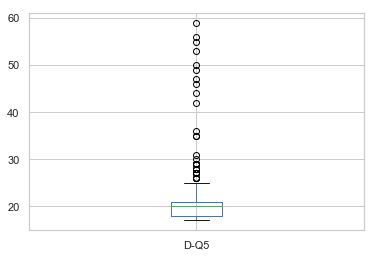

In [38]:
Daten.loc[Daten['D-Q5']!=0,'D-Q5'].plot(kind='box')

In [39]:
#Daten['D-Q5'].value_counts()

In [40]:
Daten['D-Q5_neu'] = 0

j=0
for i in Daten['D-Q5']:
    if i == 0:
        Daten.loc[j,'D-Q5_neu'] = 0
    elif i > 0 and i <= 18:
        Daten.loc[j,'D-Q5_neu'] = 1
    elif i > 18 and i <= 19: #19
        Daten.loc[j,'D-Q5_neu'] = 2
    elif i > 19 and i <= 21:
        Daten.loc[j,'D-Q5_neu'] = 3
    else:
        Daten.loc[j,'D-Q5_neu'] = 4
    j = j+1

In [41]:
Daten['D-Q5_neu'].value_counts()

1    104
3     99
4     92
2     84
0     11
Name: D-Q5_neu, dtype: int64

In [42]:
Daten.rename(columns={'D-Q5_neu':'V_Alter'}, inplace=True)

##### Geschlecht

Im Fall der Variable "Geschlecht" liegen für die Kategorie "Andere" zu wenige Nennungen für die Analyse vor, sodass diese Angaben mit "0" rekodiert werden.

In [43]:
Daten['D-Q6'].value_counts()

1    287
2     91
3      6
0      6
Name: D-Q6, dtype: int64

In [44]:
Daten['D-Q6_neu'] = 0

j=0
for i in Daten['D-Q6']:
    if i == 1:
        Daten.loc[j,'D-Q6_neu'] = 1
    elif i == 2:
        Daten.loc[j,'D-Q6_neu'] = 2
    j = j+1

In [45]:
Daten['D-Q6_neu'].value_counts()

1    287
2     91
0     12
Name: D-Q6_neu, dtype: int64

In [46]:
Daten.rename(columns={'D-Q6_neu':'V_Geschlecht'}, inplace=True)

##### Erstsprache(n)

Da es sich insgesamt um eine sehr homogene Gruppe in Bezug auf die Erstsprache(n) handelt, können als Variablen nur Erstsprache Spanisch (ja/nein) und die Angabe mehr als einer Erstsprache untersucht werden. 

*Erstsprache Spanisch:*

In [47]:
Daten['D-Q7_neu'] = 0

j=0
for i in Daten['D-Q7']:
    if i == 1:
        Daten.loc[j,'D-Q7_neu'] = 1
    else:
        Daten.loc[j,'D-Q7_neu'] = 2
    j = j+1

j=0
for i in Daten['D-Q7c']:
    if i == 1:
        Daten.loc[j,'D-Q7_neu'] = 1
    j = j+1

j=0
for i in Daten['D-Q7e']:
    if i == 1:
        Daten.loc[j,'D-Q7_neu'] = 1
    j = j+1

In [48]:
Daten['D-Q7_neu'].value_counts()

1    363
2     27
Name: D-Q7_neu, dtype: int64

363 Studierende haben Spanisch als eine ihrer Erstsprachen angegeben. Die übrigen 25 verteilen sich auf verschiedene Sprachen (2 TN haben diese Frage nicht beantwortet), darunter haben 5 Personen Katalanisch/Valencianisch und 4 Galicisch angegeben.

In [49]:
Daten.rename(columns={'D-Q7_neu':'V_Erstsprache_Span'}, inplace=True)

*L1-Bi/Trilingualismus:*

In [50]:
Daten['D-Q7b'].value_counts()

2    287
1    103
Name: D-Q7b, dtype: int64

103 Personen sind laut eigenen Angaben bi- oder trilingual.

In [51]:
Daten.rename(columns={'D-Q7b':'V_L1-Bi/Trilingualismus'}, inplace=True)

*Einzelne Sprachen (Überprüfung der Zuordnung):*

Mittels der Analyse der freien Texteingaben wurde überprüft, ob Antworten rekodiert werden sollten. Dies war einmal der Fall für Galicisch und einmal für Valencianisch.

In [52]:
Daten['D-Q7d'].value_counts()

0                                                                           387
Gallego                                                                       1
Un dialecto en la parte sur de provincia Zhe Jiang. Dialecto de Wen zhou      1
Valenciano                                                                    1
Name: D-Q7d, dtype: int64

In [53]:
for ind in Daten.loc[Daten['D-Q7c']==46,:].index:    
    if 'gallego' in str(Daten.loc[ind,'D-Q7d']).lower():
        Daten.loc[ind,'D-Q7c'] = 3

In [54]:
for ind in Daten.loc[Daten['D-Q7c']==46,:].index:    
    if 'valenciano' in str(Daten.loc[ind,'D-Q7d']).lower():
        Daten.loc[ind,'D-Q7c'] = 2

##### Weitere Sprachkenntnisse

In Bezug auf die weiteren Sprachkenntnisse der TN ist für das Forschungsinteresse einerseits interessant, wie viele Sprachen angegeben wurden, und andererseits, um welche Sprachen es sich handelt.

In [55]:
Spr_cols = ['D-Q7','D-Q7c','D-Q7e','D-Q8_1','D-Q8_2','D-Q8_3','D-Q8_4','D-Q8_5','D-Q8_6','D-Q8_7']

*Anzahl genannter Fremdsprachen:*

In [56]:
Anzahl_Sprachen = []

for i in Daten.index:
    Spr_arr = Daten[Spr_cols[3:]].loc[i].unique()
    Spr_arr = Spr_arr[Spr_arr != 0]
    Anzahl_Sprachen.append(len(Spr_arr))

In [57]:
Daten['V_Spr_Zahl'] = Anzahl_Sprachen

In [58]:
Daten['V_Spr_Zahl'].value_counts()

4    115
3     85
5     83
6     40
7     33
2     27
0      4
1      3
Name: V_Spr_Zahl, dtype: int64

In [59]:
Daten[Daten['V_Spr_Zahl']!=0]['V_Spr_Zahl'].describe()

count    386.000000
mean       4.295337
std        1.373527
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        7.000000
Name: V_Spr_Zahl, dtype: float64

Unter Berücksichtigung der Verteilung der Anzahl genannter Sprachen pro TN werden Kategorien gebildet.

In [60]:
j=0
for i in Daten['V_Spr_Zahl']:
    if i < 3:
        Daten.loc[j,'V_Spr_Zahl'] = 1
    elif i >= 3 and i < 4:
        Daten.loc[j,'V_Spr_Zahl'] = 3
    elif i >= 4 and i < 5:
        Daten.loc[j,'V_Spr_Zahl'] = 4
    elif i >= 5:
        Daten.loc[j,'V_Spr_Zahl'] = 5
    j = j+1

In [61]:
Daten['V_Spr_Zahl'].value_counts()

5    156
4    115
3     85
1     34
Name: V_Spr_Zahl, dtype: int64

*Anzahl genannter Sprachen (inkl. Erstsprachen):*

In [62]:
Anzahl_Sprachen_ges = []

for i in Daten.index:
    Spr_arr = Daten[Spr_cols].loc[i].unique()
    Spr_arr = Spr_arr[Spr_arr != 0]
    Anzahl_Sprachen_ges.append(len(Spr_arr))

In [63]:
Daten['V_Spr_Zahl_ges'] = Anzahl_Sprachen_ges

In [64]:
Daten['V_Spr_Zahl_ges'].describe()

count    390.000000
mean       5.630769
std        1.686809
min        1.000000
25%        4.000000
50%        5.500000
75%        7.000000
max       10.000000
Name: V_Spr_Zahl_ges, dtype: float64

In [65]:
j=0
for i in Daten['V_Spr_Zahl_ges']:
    if i < 4:
        Daten.loc[j,'V_Spr_Zahl_ges'] = 1
    elif i >= 4 and i < 5:
        Daten.loc[j,'V_Spr_Zahl_ges'] = 4
    elif i >= 5 and i < 7:
        Daten.loc[j,'V_Spr_Zahl_ges'] = 5
    elif i >= 7:
        Daten.loc[j,'V_Spr_Zahl_ges'] = 7
    j = j+1

In [66]:
Daten['V_Spr_Zahl_ges'].value_counts()

5    185
7    106
4     66
1     33
Name: V_Spr_Zahl_ges, dtype: int64

*Einzelne Sprachen und Sprachgruppen:*

Die Angabe von Französisch, Latein oder Altgriechisch kann aufgrund der ausreichenden Zahl an Nennungen jeweils als eigenen Variable angenommen werden. Im Fall anderer Sprachen werden Gruppen gebildet. 

In [67]:
l_germ = [9,15,39,19,36]
l_rom = [13,16,17]
l_slaw = [23,24,25,26,27,28,41,18,44]
l_asiat = [6,7,8,14,22,31,42,45]

In [68]:
Daten['D-Q8_fr'] = 0
Daten['D-Q8_gr'] = 0
Daten['D-Q8_lat'] = 0
Daten['D-Q8_germ'] = 0
Daten['D-Q8_rom'] = 0
Daten['D-Q8_slaw'] = 0
Daten['D-Q8_asiat'] = 0

In [69]:
for i in Daten.index:
    for el in Daten.loc[i,Spr_cols]:
        if el == 10:
            Daten.loc[i,'D-Q8_fr'] = 1
            pass

In [70]:
for i in Daten.index:
    for el in Daten.loc[i,Spr_cols]:
        if el == 20:
            Daten.loc[i,'D-Q8_gr'] = 1
            pass

In [71]:
for i in Daten.index:
    for el in Daten.loc[i,Spr_cols]:
        if el == 21:
            Daten.loc[i,'D-Q8_lat'] = 1
            pass

In [72]:
for i in Daten.index:
    for el in Daten.loc[i,Spr_cols]:
        if el in l_germ:
            Daten.loc[i,'D-Q8_germ'] = 1
            pass

In [73]:
for i in Daten.index:
    for el in Daten.loc[i,Spr_cols]:
        if el in l_rom:
            Daten.loc[i,'D-Q8_rom'] = 1
            pass

In [74]:
for i in Daten.index:
    for el in Daten.loc[i,Spr_cols]:
        if el in l_slaw:
            Daten.loc[i,'D-Q8_slaw'] = 1
            pass

In [75]:
for i in Daten.index:
    for el in Daten.loc[i,Spr_cols]:
        if el in l_asiat:
            Daten.loc[i,'D-Q8_asiat'] = 1
            pass

In [76]:
Daten.rename(columns={'D-Q8_fr':'V_Spr_Fran'}, inplace=True)
Daten.rename(columns={'D-Q8_gr':'V_Spr_Griech'}, inplace=True)
Daten.rename(columns={'D-Q8_lat':'V_Spr_Latein'}, inplace=True)
Daten.rename(columns={'D-Q8_germ':'V_Spr_Germ'}, inplace=True)
Daten.rename(columns={'D-Q8_rom':'V_Spr_Rom'}, inplace=True)
Daten.rename(columns={'D-Q8_slaw':'V_Spr_Slaw'}, inplace=True)
Daten.rename(columns={'D-Q8_asiat':'V_Spr_Asiat'}, inplace=True)

In [77]:
df_spearman(Daten,['V_Spr_Griech','V_Spr_Latein'])

,V_Spr_Griech,V_Spr_Latein
V_Spr_Griech,1,0.61883
V_Spr_Latein,0.61883,1


In [78]:
Daten['V_Spr_Klass'] = 0

j=0
for i in Daten['V_Spr_Griech']:
    if i == 1:
        Daten.loc[j,'V_Spr_Klass'] = 1
    j = j+1

j=0
for i in Daten['V_Spr_Latein']:
    if i == 1:
        Daten.loc[j,'V_Spr_Klass'] = 1
    j = j+1

In [79]:
Daten['V_Spr_Klass'].value_counts()

0    200
1    190
Name: V_Spr_Klass, dtype: int64

##### Kontexte und Methoden der Aneignung von Erschließungsstrategien

Aus den Angaben der TN in Teil B der Befragung wird eine Reihe an Variablen erstellt, die sich auf den Kontext und die Art und Weise des Strategienerwerbs beziehen. 

*Strategienerwerbskontexte:*

In [80]:
erwerb = {'E1': ['B-Q2-1_1','B-Q2-1_2','B-Q2-1_3','B-Q2-1_4','B-Q2-1_5','B-Q2-1_6','B-Q2-1_7'], 
         'E2': ['B-Q2-2_1','B-Q2-2_2','B-Q2-2_3','B-Q2-2_4','B-Q2-2_5','B-Q2-2_6','B-Q2-2_7'],
         'E3': ['B-Q2-3_1','B-Q2-3_2','B-Q2-3_3','B-Q2-3_4','B-Q2-3_5','B-Q2-3_6','B-Q2-3_7'],
         'E4': ['B-Q2-4_1','B-Q2-4_2','B-Q2-4_3','B-Q2-4_4','B-Q2-4_5','B-Q2-4_6','B-Q2-4_7'],
         'E5': ['B-Q2-5_1','B-Q2-5_2','B-Q2-5_3','B-Q2-5_4','B-Q2-5_5','B-Q2-5_6','B-Q2-5_7'],
         'E6': ['B-Q2-6_1','B-Q2-6_2','B-Q2-6_3','B-Q2-6_4','B-Q2-6_5','B-Q2-6_6','B-Q2-6_7'],
         'E7': ['B-Q2-7_1','B-Q2-7_2','B-Q2-7_3','B-Q2-7_4','B-Q2-7_5','B-Q2-7_6','B-Q2-7_7'],
         'E8': ['B-Q2-8_1','B-Q2-8_2','B-Q2-8_3','B-Q2-8_4','B-Q2-8_5'],
         'E9': ['B-Q2-9_1','B-Q2-9_2','B-Q2-9_3','B-Q2-9_4','B-Q2-9_5']}

1. Im Sprach- und Literaturunterricht (muttersprachlicher Unterricht) in der Schule
2. Im Englischunterricht in der Schule
3. In anderem Sprachunterricht in der Schule
4. In früheren Deutschkursen an der Universität
5. In anderen Lehrveranstaltungen im Rahmen meines Studiums
6. In Sprachkursen in Sprachschulen
7. In meinem aktuellen Deutschkurs
8. In der Familie, im Freundeskreis oder durch Kommilitonen/innen
9. Allein, ohne Hilfe anderer Personen

In [81]:
Daten['B-Q2_E1'] = 0
Daten['B-Q2_E2'] = 0
Daten['B-Q2_E3'] = 0
Daten['B-Q2_E4'] = 0
Daten['B-Q2_E5'] = 0
Daten['B-Q2_E6'] = 0
Daten['B-Q2_E7'] = 0
Daten['B-Q2_E8'] = 0
Daten['B-Q2_E9'] = 0

In [82]:
add_columns(Daten,erwerb['E1'],'B-Q2_E1')

In [83]:
add_columns(Daten,erwerb['E2'],'B-Q2_E2')

In [84]:
add_columns(Daten,erwerb['E3'],'B-Q2_E3')

In [85]:
add_columns(Daten,erwerb['E4'],'B-Q2_E4')

In [86]:
add_columns(Daten,erwerb['E5'],'B-Q2_E5')

In [87]:
add_columns(Daten,erwerb['E6'],'B-Q2_E6')

In [88]:
add_columns(Daten,erwerb['E7'],'B-Q2_E7')

In [89]:
add_columns(Daten,erwerb['E8'],'B-Q2_E8')

In [90]:
add_columns(Daten,erwerb['E9'],'B-Q2_E9')

In [91]:
Daten.rename(columns={'B-Q2_E1':'V_E_Schule_LL'}, inplace=True)
Daten.rename(columns={'B-Q2_E2':'V_E_Schule_Eng'}, inplace=True)
Daten.rename(columns={'B-Q2_E3':'V_E_Schule_Spr'}, inplace=True)
Daten.rename(columns={'B-Q2_E4':'V_E_Univ_DK'}, inplace=True)
Daten.rename(columns={'B-Q2_E5':'V_E_Univ_andere'}, inplace=True)
Daten.rename(columns={'B-Q2_E6':'V_E_Sprachschule'}, inplace=True)
Daten.rename(columns={'B-Q2_E7':'V_E_DK_aktuell'}, inplace=True)
Daten.rename(columns={'B-Q2_E8':'V_E_Sozial'}, inplace=True)
Daten.rename(columns={'B-Q2_E9':'V_E_autonom'}, inplace=True)

*Methoden des Strategienerwerbs:*

In [92]:
erwerb1 = {'U1': ['B-Q2-1_1','B-Q2-2_1','B-Q2-3_1','B-Q2-4_1','B-Q2-5_1','B-Q2-6_1','B-Q2-7_1'], 
         'U2': ['B-Q2-1_2','B-Q2-2_2','B-Q2-3_2','B-Q2-4_2','B-Q2-5_2','B-Q2-6_2','B-Q2-7_2'],
         'U3': ['B-Q2-1_3','B-Q2-2_3','B-Q2-3_3','B-Q2-4_3','B-Q2-5_3','B-Q2-6_3','B-Q2-7_3'],
         'U4': ['B-Q2-1_4','B-Q2-2_4','B-Q2-3_4','B-Q2-4_4','B-Q2-5_4','B-Q2-6_4','B-Q2-7_4'],
         'U5': ['B-Q2-1_5','B-Q2-2_5','B-Q2-3_5','B-Q2-4_5','B-Q2-5_5','B-Q2-6_5','B-Q2-7_5'],
         'U6': ['B-Q2-1_6','B-Q2-2_6','B-Q2-3_6','B-Q2-4_6','B-Q2-5_6','B-Q2-6_6','B-Q2-7_6']}

1. Erschließungsstrategien wurden im Unterricht vorgestellt (und erklärt).
2. Die Lehrperson hat Tipps für das selbständige Aneignen von Erschließungsstrategien gegeben, z.B. über Internetseiten, Bücher oder andere Materialien, in denen Lernstrategien erklärt werden.
3. Erschließungsstrategien wurden anhand von praktischen Beispielen, beim Ausführen bestimmter Aufgaben, z.B. Lesen eines schwierigen Textes, erklärt und geübt.
4. Verschiedene Erschließungsstrategien wurden ausprobiert und miteinander verglichen.
5. Reflexionen über Einsatz von Erschließungsstrategien wurden durchgeführt, z.B. Überlegungen, welche Strategie in einer bestimmten Situation und/oder für eine bestimmte Person geeignet ist.
6. Im Laufe des Unterrichts habe ich verschiedene Erschließungsstrategien unbewusst gelernt, z.B. beim Lesen von schwierigen Texten - ohne Erklärung oder Hinweis des Lehrers.

In [93]:
Daten['B-Q2_U1'] = 0
Daten['B-Q2_U2'] = 0
Daten['B-Q2_U3'] = 0
Daten['B-Q2_U4'] = 0
Daten['B-Q2_U5'] = 0
Daten['B-Q2_U6'] = 0

In [94]:
add_columns(Daten,erwerb1['U1'],'B-Q2_U1')

In [95]:
add_columns(Daten,erwerb1['U2'],'B-Q2_U2')

In [96]:
add_columns(Daten,erwerb1['U3'],'B-Q2_U3')

In [97]:
add_columns(Daten,erwerb1['U4'],'B-Q2_U4')

In [98]:
add_columns(Daten,erwerb1['U5'],'B-Q2_U5')

In [99]:
add_columns(Daten,erwerb1['U6'],'B-Q2_U6')

In [100]:
Daten.rename(columns={'B-Q2_U1':'V_Met_Erkl'}, inplace=True)
Daten.rename(columns={'B-Q2_U2':'V_Met_Tipps'}, inplace=True)
Daten.rename(columns={'B-Q2_U3':'V_Met_Training'}, inplace=True)
Daten.rename(columns={'B-Q2_U4':'V_Met_Vgl'}, inplace=True)
Daten.rename(columns={'B-Q2_U5':'V_Met_Reflexion'}, inplace=True)
Daten.rename(columns={'B-Q2_U6':'V_Met_unbewusst'}, inplace=True)

#### Mögliche weitere Einflussfaktoren und wichtige Werte für die Analyse

In [101]:
#Daten['Finished'].value_counts()

In [102]:
#Daten.rename(columns={'Finished':'W_Finished'}, inplace=True)

*Pilotstudie:*

In [103]:
Daten['pilot'].value_counts()

0    324
1     66
Name: pilot, dtype: int64

In [104]:
Daten.rename(columns={'pilot':'W_Pilot'}, inplace=True)

*Erhebungssituation:*

In [105]:
Daten['D-Q9_1'].value_counts()

1    228
0    162
Name: D-Q9_1, dtype: int64

In [106]:
Daten.rename(columns={'D-Q9_1':'W_Erhebung_im_U'}, inplace=True)
Daten.rename(columns={'D-Q9_2':'W_Erhebung_nicht_U'}, inplace=True)

*Version des Fragebogens:*

In [107]:
Daten['D-Q9_pap'] = 0

j=0
for i in Daten['IPAddress']:
    if i == '2.154.100.40':
        Daten.loc[j,'D-Q9_pap'] = 1
    j = j+1

In [108]:
Daten[Daten['D-Q9_pap']==1]['D-Q1'].value_counts()

67    54
50     7
20     3
63     1
Name: D-Q1, dtype: int64

In [109]:
Daten.rename(columns={'D-Q9_pap':'W_Papierversion_FB'}, inplace=True)

*Universitäten:*

In [110]:
Daten['D-Q1'].value_counts()

63    152
67     56
73     35
29     30
66     28
20     26
70     18
8       9
50      7
2       6
9       4
37      4
0       3
71      3
75      2
51      2
35      1
16      1
42      1
58      1
48      1
Name: D-Q1, dtype: int64

Die Angaben zu "Andere" werden überprüft, in zwei Fällen wird die Universitätszugehörigkeit rekodiert.

In [111]:
Daten['D-Q1a'].value_counts()

0                                                                                                                                                              386
Universidad de Valencia                                                                                                                                          1
Gran estudio y gran encuesta                                                                                                                                     1
Universidad Complutence                                                                                                                                          1
Los medios y recursos del sistema educativo influyen de manera inevitable en el desarrollo de Estrategias de Aprendizaje, su tratamiento y su explicación.       1
Name: D-Q1a, dtype: int64

In [112]:
for ind in Daten.loc[Daten['D-Q1']==75,:].index:    
    if 'compluten' in str(Daten.loc[ind,'D-Q1a']).lower():
        Daten.loc[ind,'D-Q1'] = 20

In [113]:
for ind in Daten.loc[Daten['D-Q1']==75,:].index:    
    if 'valenci' in str(Daten.loc[ind,'D-Q1a']).lower():
        Daten.loc[ind,'D-Q1'] = 70

Die meist genannten Universitäten werden zu Gruppen zusammengefasst.

In [114]:
Daten['D-Q1_neu'] = 0

j=0
for i in Daten['D-Q1']:
    if i == 0:
        Daten.loc[j,'D-Q1_neu'] = 0
    elif i == 63:
        Daten.loc[j,'D-Q1_neu'] = 1
    elif i == 67:
        Daten.loc[j,'D-Q1_neu'] = 2
    elif i == 73:
        Daten.loc[j,'D-Q1_neu'] = 3
    elif i == 29:
        Daten.loc[j,'D-Q1_neu'] = 4
    elif i == 66:
        Daten.loc[j,'D-Q1_neu'] = 5
    elif i == 20:
        Daten.loc[j,'D-Q1_neu'] = 6
    else:
        Daten.loc[j,'D-Q1_neu'] = 7
    j = j+1

In [115]:
Daten['D-Q1_neu'].value_counts()

1    152
7     59
2     56
3     35
4     30
5     28
6     27
0      3
Name: D-Q1_neu, dtype: int64

In [116]:
Daten.rename(columns={'D-Q1_neu':'W_Univ'}, inplace=True)

*Zugehörigkeit zu einer bestimmten Universität:*

In [117]:
Daten['D-Q1_Sal'] = 0
Daten['D-Q1_Sev'] = 0
Daten['D-Q1_Vigo'] = 0
Daten['D-Q1_Gran'] = 0
Daten['D-Q1_Sant'] = 0
Daten['D-Q1_Madrid'] = 0

In [118]:
j=0
for i in Daten['D-Q1']:
    if i == 63:
        Daten.loc[j,'D-Q1_Sal'] = 1
    j = j+1

In [119]:
j=0
for i in Daten['D-Q1']:
    if i == 67:
        Daten.loc[j,'D-Q1_Sev'] = 1
    j = j+1

In [120]:
j=0
for i in Daten['D-Q1']:
    if i == 73:
        Daten.loc[j,'D-Q1_Vigo'] = 1
    j = j+1

In [121]:
j=0
for i in Daten['D-Q1']:
    if i == 29:
        Daten.loc[j,'D-Q1_Gran'] = 1
    j = j+1

In [122]:
j=0
for i in Daten['D-Q1']:
    if i == 66:
        Daten.loc[j,'D-Q1_Sant'] = 1
    j = j+1

In [123]:
j=0
for i in Daten['D-Q1']:
    if i == 20:
        Daten.loc[j,'D-Q1_Madrid'] = 1
    j = j+1

In [124]:
Daten['D-Q1_Madrid'].value_counts()

0    363
1     27
Name: D-Q1_Madrid, dtype: int64

##### Werte für Analyse anpassen

Um die Angabe "Variable x nicht gewählt" von fehlenden Werten zu unterscheiden, wird im Fall der neu kreierten Variablen 0 mit 2 rekodiert.

In [125]:
cols = ['V_Spr_Fran','V_Spr_Griech','V_Spr_Latein','V_Spr_Klass','V_Spr_Germ','V_Spr_Rom','V_Spr_Slaw','V_Spr_Asiat',
        'V_E_Schule_LL','V_E_Schule_Eng','V_E_Schule_Spr','V_E_Univ_DK','V_E_Univ_andere','V_E_Sprachschule','V_E_DK_aktuell','V_E_Sozial','V_E_autonom',
        'V_Met_Erkl','V_Met_Tipps','V_Met_Training','V_Met_Vgl','V_Met_Reflexion','V_Met_unbewusst',
        'W_Erhebung_im_U', 'W_Erhebung_nicht_U', 'W_Pilot', 'W_Papierversion_FB']

In [126]:
Daten[cols] = Daten[cols].replace(0,2)

### Abhängige Variablen

In [127]:
strat = {'S1': ['A-Q3_5','A-Q3_6','A-Q3_7','A-Q3_8','A-Q3_9'], 
         'S2': ['A-Q3_1','A-Q3_2','A-Q3_3','A-Q3_4','A-Q3_5'],
         'S3': ['A-Q3_9','A-Q3_10','A-Q3_11','A-Q3_12'],
         'S4': ['A-Q3_13','A-Q3_14','A-Q3_15','A-Q3_16','A-Q3_17','A-Q3_18','A-Q3_19','A-Q3_20'],
         #'S4a': ['A-Q3_13','A-Q3_14','A-Q3_15','A-Q3_16'],
         #'S4b': ['A-Q3_17','A-Q3_18','A-Q3_19','A-Q3_20'],
         'S5': ['A-Q3_21','A-Q3_22','A-Q3_23','A-Q3_24','A-Q3_25'],
         'S6': ['A-Q3_26','A-Q3_27','A-Q3_28','A-Q3_29','A-Q3_30','A-Q3_31']}

* S1: Auf Wortebene - intralingual
* S2: Auf Wortebene - interlingual
* S3: Auf Satz- und Textebene - engerer Kontext
* S4: Auf Satz- und Textebene - weiterer Kontext (S4a: intratextuell, S4b: Bezug zu Fach- und Weltwissen)
* S5: Außersprachlicher Kontext
* S6: Metakognitive Strategien

Ergebnisse der Faktorenanalyse (in R durchgeführt):

In [128]:
fakt = {'F1': ['A-Q3_6','A-Q3_7','A-Q3_8','A-Q3_9','A-Q3_14','A-Q3_15','A-Q3_10'], 
        'F2': ['A-Q3_1','A-Q3_2','A-Q3_3','A-Q3_4','A-Q3_5'],
        'F3': ['A-Q3_10','A-Q3_11','A-Q3_12','A-Q3_13'],
        'F4': ['A-Q3_16','A-Q3_17','A-Q3_18','A-Q3_19','A-Q3_20'],
        'F5': ['A-Q3_21','A-Q3_22','A-Q3_23','A-Q3_24'],
        'F6': ['A-Q3_26','A-Q3_27','A-Q3_28','A-Q3_29','A-Q3_30','A-Q3_31']}

* F1(MR2): intralinguale Hinweise (Wortbildung, morphosyntaktische Regularitäten, Orthographie) + Konnektoren, Erklärungshilfen
* F2(MR3): interlinguale Hinweise (inkl. Ethymologie)
* F3(MR4): engerer Kontext, Analyse auf Satzebene (Syntax, semantische Relationen)
* F4(MR1): Kontextwissen (Textsorte, behandeltes Thema, kulturelles Wissen...)
* F5(MR6): Bilder, Grafiken, Symbole, Zahlen, Kommunikationssituation
* F6(MR5): metakognitive Strategien

Anpassung der Strategiengruppen nach Erkenntnissen der Faktorenanalyse?

problematisch: Item 14, 15; 10; 13, 16; 25?

##### Scores

Score für alle Likert-Items in A_Q3:

In [129]:
Score = []
for i in Daten.index:
    Score.append(sum(Daten[Liste_A_Q3].loc[i]))

In [130]:
Daten['A-Q4_Score'] = Score

In [131]:
Daten['A-Q4_Score'].describe()

count    390.000000
mean     106.179487
std       16.454302
min       50.000000
25%       95.000000
50%      107.000000
75%      117.000000
max      151.000000
Name: A-Q4_Score, dtype: float64

In [132]:
Daten['A-Q4_Score_qu'] = 0

j=0
for i in Daten['A-Q4_Score']:
    if i <= 95:
        Daten.loc[j,'A-Q4_Score_qu'] = 1
    elif i > 95 and i <= 107:
        Daten.loc[j,'A-Q4_Score_qu'] = 2
    elif i > 107 and i <=117:
        Daten.loc[j,'A-Q4_Score_qu'] = 3
    else:
        Daten.loc[j,'A-Q4_Score_qu'] = 4
    j = j+1

In [133]:
Daten['A-Q4_Score_qu'].value_counts()

1    99
3    98
2    98
4    95
Name: A-Q4_Score_qu, dtype: int64

Scores für die einzelnen Strategiengruppen in A_Q3:

In [134]:
Score_S1 = []
for i in Daten.index:
    Score_S1.append(sum(Daten[strat['S1']].loc[i]))

Daten['A-Q4_Score_S1'] = Score_S1

In [135]:
Score_S2 = []
for i in Daten.index:
    Score_S2.append(sum(Daten[strat['S2']].loc[i]))

Daten['A-Q4_Score_S2'] = Score_S2

In [136]:
Score_S3 = []
for i in Daten.index:
    Score_S3.append(sum(Daten[strat['S3']].loc[i]))

Daten['A-Q4_Score_S3'] = Score_S3

In [137]:
Score_S4 = []
for i in Daten.index:
    Score_S4.append(sum(Daten[strat['S4']].loc[i]))

Daten['A-Q4_Score_S4'] = Score_S4

In [138]:
Score_S5 = []
for i in Daten.index:
    Score_S5.append(sum(Daten[strat['S5']].loc[i]))

Daten['A-Q4_Score_S5'] = Score_S5

In [139]:
Score_S6 = []
for i in Daten.index:
    Score_S6.append(sum(Daten[strat['S6']].loc[i]))

Daten['A-Q4_Score_S6'] = Score_S6

##### Mindestanzahl an Strategien

*Mindestanzahl an Strategien nach Strategiengruppen:*

In [140]:
Daten['A-Q4_S1'] = 0

for i in Daten.index:
    el = Daten.loc[i,strat['S1']]
    if el[el>=3].count() >= 2:
        Daten.loc[i,'A-Q4_S1'] = 1

In [141]:
Daten['A-Q4_S2'] = 0

for i in Daten.index:
    el = Daten.loc[i,strat['S2']]
    if el[el>=3].count() >= 2:
        Daten.loc[i,'A-Q4_S2'] = 1

In [142]:
Daten['A-Q4_S3'] = 0

for i in Daten.index:
    el = Daten.loc[i,strat['S3']]
    if el[el>=3].count() >= 2:
        Daten.loc[i,'A-Q4_S3'] = 1

In [143]:
Daten['A-Q4_S4'] = 0

for i in Daten.index:
    el = Daten.loc[i,strat['S4']]
    if el[el>=3].count() >= 4:
        Daten.loc[i,'A-Q4_S4'] = 1

In [144]:
Daten['A-Q4_S5'] = 0

for i in Daten.index:
    el = Daten.loc[i,strat['S5']]
    if el[el>=3].count() >= 2:
        Daten.loc[i,'A-Q4_S5'] = 1

In [145]:
Daten['A-Q4_S6'] = 0

for i in Daten.index:
    el = Daten.loc[i,strat['S6']]
    if el[el>=3].count() >= 3:
        Daten.loc[i,'A-Q4_S6'] = 1

In [146]:
strat_gr = ['A-Q4_S1','A-Q4_S2','A-Q4_S3','A-Q4_S4','A-Q4_S5','A-Q4_S6']

In [147]:
Daten[strat_gr].sum()

A-Q4_S1    362
A-Q4_S2    361
A-Q4_S3    333
A-Q4_S4    357
A-Q4_S5    362
A-Q4_S6    373
dtype: int64

In [148]:
Stratgr_sum = []
for i in Daten.index:
    Stratgr_sum.append(sum(Daten[strat_gr].loc[i]))

Daten['A-Q4_Stratgr'] = Stratgr_sum

In [149]:
Daten['A-Q4_Stratgr'].value_counts()

6    256
5     92
4     32
3      6
2      2
1      2
Name: A-Q4_Stratgr, dtype: int64

*Mindestanzahl an Strategien in allen Gruppen:*

In [150]:
Daten['A-Q4_Stratgr_all'] = 2

j=0
for i in Daten['A-Q4_Stratgr']:
    if i == 6:
        Daten.loc[j,'A-Q4_Stratgr_all'] = 1
    j = j+1

In [151]:
Daten['A-Q4_Stratgr_all'].value_counts()

1    256
2    134
Name: A-Q4_Stratgr_all, dtype: int64

#### Auswahl der Variablen für die Analyse

In [152]:
Liste_A_Q3 = [col for col in Daten.columns if 'A-Q3' in col]

In [153]:
Liste_A_Q4 = [col for col in Daten.columns if 'A-Q4' in col]

In [154]:
Liste_D = [col for col in Daten.columns if 'D-Q' in col]

In [155]:
Liste_Var = [col for col in Daten.columns if 'V_' in col]

In [157]:
Liste_Var

['V_L1-Bi/Trilingualismus',
 'V_Studienrichtung',
 'V_Studienjahr+Studium',
 'V_Niveau_DK',
 'V_Alter',
 'V_Geschlecht',
 'V_Erstsprache_Span',
 'V_Spr_Zahl',
 'V_Spr_Zahl_ges',
 'V_Spr_Fran',
 'V_Spr_Griech',
 'V_Spr_Latein',
 'V_Spr_Germ',
 'V_Spr_Rom',
 'V_Spr_Slaw',
 'V_Spr_Asiat',
 'V_Spr_Klass',
 'V_E_Schule_LL',
 'V_E_Schule_Eng',
 'V_E_Schule_Spr',
 'V_E_Univ_DK',
 'V_E_Univ_andere',
 'V_E_Sprachschule',
 'V_E_DK_aktuell',
 'V_E_Sozial',
 'V_E_autonom',
 'V_Met_Erkl',
 'V_Met_Tipps',
 'V_Met_Training',
 'V_Met_Vgl',
 'V_Met_Reflexion',
 'V_Met_unbewusst']

In [158]:
Liste_Var1 = ['V_L1-Bi/Trilingualismus',
 'V_Geschlecht',
 'V_Erstsprache_Span',
 'V_Spr_Fran',
 'V_Spr_Griech',
 'V_Spr_Latein',
    'V_Spr_Klass',
 'V_Spr_Germ',
 'V_Spr_Rom',
 'V_Spr_Slaw',
 'V_Spr_Asiat',
 'V_E_Schule_LL',
 'V_E_Schule_Eng',
 'V_E_Schule_Spr',
 'V_E_Univ_DK',
 'V_E_Univ_andere',
 'V_E_Sprachschule',
 'V_E_DK_aktuell',
 'V_E_Sozial',
 'V_E_autonom',
 'V_Met_Erkl',
 'V_Met_Tipps',
 'V_Met_Training',
 'V_Met_Vgl',
 'V_Met_Reflexion',
 'V_Met_unbewusst']

In [159]:
df_spearman(Daten,['V_Studienrichtung','V_Studienjahr+Studium','V_Niveau_DK','V_Alter','V_Spr_Zahl','V_Spr_Zahl_ges'])

,V_Studienrichtung,V_Studienjahr+Studium,V_Niveau_DK,V_Alter,V_Spr_Zahl,V_Spr_Zahl_ges
V_Studienrichtung,1,-0.145152,-0.325985,-0.251804,0.0432894,0.0828028
V_Studienjahr+Studium,-0.145152,1,0.650563,0.51265,0.11726,0.144223
V_Niveau_DK,-0.325985,0.650563,1,0.474532,0.0806181,0.089354
V_Alter,-0.251804,0.51265,0.474532,1,0.0232281,0.0330407
V_Spr_Zahl,0.0432894,0.11726,0.0806181,0.0232281,1,0.786417
V_Spr_Zahl_ges,0.0828028,0.144223,0.089354,0.0330407,0.786417,1


In [160]:
df_spearman_pv(Daten,['V_Studienrichtung','V_Studienjahr+Studium','V_Niveau_DK','V_Alter','V_Spr_Zahl','V_Spr_Zahl_ges'])

,V_Studienrichtung,V_Studienjahr+Studium,V_Niveau_DK,V_Alter,V_Spr_Zahl,V_Spr_Zahl_ges
V_Studienrichtung,0,0.00407173,4.16418e-11,4.69965e-07,0.393907,0.102515
V_Studienjahr+Studium,0.00407173,0,2.67123e-48,1.60254e-27,0.0205439,0.00431767
V_Niveau_DK,4.16418e-11,2.67123e-48,0,2.70452e-23,0.111934,0.0779912
V_Alter,4.69965e-07,1.60254e-27,2.70452e-23,0,0.64745,0.515315
V_Spr_Zahl,0.393907,0.0205439,0.111934,0.64745,0,3.39967e-83
V_Spr_Zahl_ges,0.102515,0.00431767,0.0779912,0.515315,3.39967e-83,0


In [610]:
df_spearman(Daten,Liste_Var1)

,V_L1-Bi/Trilingualismus,V_Geschlecht,V_Erstsprache_Span,V_Spr_Fran,V_Spr_Griech,V_Spr_Latein,V_Spr_Klass,V_Spr_Germ,V_Spr_Rom,V_Spr_Slaw,V_Spr_Asiat,V_E_Schule_LL,V_E_Schule_Eng,V_E_Schule_Spr,V_E_Univ_DK,V_E_Univ_andere,V_E_Sprachschule,V_E_DK_aktuell,V_E_Sozial,V_E_autonom,V_Met_Erkl,V_Met_Tipps,V_Met_Training,V_Met_Vgl,V_Met_Reflexion,V_Met_unbewusst
V_L1-Bi/Trilingualismus,1,0.00878644,0.048821,0.00540877,0.141512,0.111915,0.102638,0.0243774,-0.0689301,0.159979,0.0385104,-0.105777,-0.0129322,0.0411179,-0.0811964,-0.0844299,-0.0648031,-0.0150678,-0.11047,0.00189348,-0.0242606,0.00925327,-0.0383021,0.0497743,0.058884,0.0191265
V_Geschlecht,0.00878644,1,0.0520924,0.10214,0.0668514,0.0589096,0.0659164,0.0594582,-0.0504652,0.0302293,-0.000232266,-0.0653219,-0.0662634,-0.0682378,0.0176948,-0.0166298,0.0659722,-0.0430497,0.0234046,-0.0780344,-0.0252122,-0.0582689,-0.0836546,-0.0196436,-0.0798241,0.0154868
V_Erstsprache_Span,0.048821,0.0520924,1,0.170263,0.126047,0.120226,0.124361,0.0538262,0.00148062,-0.249711,-0.154434,-0.113402,0.0047008,-0.0368498,0.0491045,0.00880427,-0.0438872,0.0629936,0.00716464,0.044002,-0.0825566,-0.0817481,-0.0867236,-0.0912264,-0.0156918,0.0906972
V_Spr_Fran,0.00540877,0.10214,0.170263,1,0.155476,0.123269,0.133403,0.0625144,-0.000332544,-0.0250768,-0.109271,-0.00682705,-0.00979005,0.0526233,-0.0204347,-0.0642962,0.0216323,-0.0137281,-0.00307204,-0.06932,-0.118881,-0.0304296,-0.0844806,-0.0516103,-0.00965111,0.0148385
V_Spr_Griech,0.141512,0.0668514,0.126047,0.155476,1,0.61883,0.643066,-0.00847589,-0.059703,0.103278,-0.0658524,-0.0500293,0.0453743,0.00411045,0.0548925,-0.00429207,0.00834171,-0.00505942,-0.0359254,-0.0203167,-0.00789332,0.00394141,0.0473431,0.0481847,0.0734642,0.0707735
V_Spr_Latein,0.111915,0.0589096,0.120226,0.123269,0.61883,1,0.984716,0.0220508,-0.106636,0.0309776,-0.0574632,-0.0283849,0.0156584,0.00629426,0.0662215,0.126974,-0.0238564,0.00793506,0.0287195,-0.020767,-0.0449506,-0.00461532,0.0211643,-0.0413192,0.0426872,0.0974217
V_Spr_Klass,0.102638,0.0659164,0.124361,0.133403,0.643066,0.984716,1,0.017057,-0.106665,0.0263605,-0.0629918,-0.0291119,0.0188335,-0.00766554,0.0671302,0.137176,-0.0260167,0.0101817,0.0202146,-0.0174957,-0.0505336,-0.0141937,0.0157862,-0.0399099,0.0412015,0.108066
V_Spr_Germ,0.0243774,0.0594582,0.0538262,0.0625144,-0.00847589,0.0220508,0.017057,1,0.0476461,0.0626216,0.0200143,-0.0764986,-0.0859666,0.00532023,-0.0435116,0.111953,0.0375601,-0.0536546,0.0489618,0.0921049,-0.036229,-0.0441836,-0.0662392,0.00355171,0.0353237,0.0942709
V_Spr_Rom,-0.0689301,-0.0504652,0.00148062,-0.000332544,-0.059703,-0.106636,-0.106665,0.0476461,1,0.0247524,-0.0189534,0.00351686,-0.0317217,0.0314425,0.0828639,0.0264056,0.0139937,0.0892641,0.00556218,0.0157383,0.0704424,0.0229072,-0.00551311,0.0561927,0.0479636,0.0423895
V_Spr_Slaw,0.159979,0.0302293,-0.249711,-0.0250768,0.103278,0.0309776,0.0263605,0.0626216,0.0247524,1,-0.0494893,-0.0469183,-0.0574903,-0.00828035,0.00478645,-0.061931,0.0212982,-0.114873,-0.076578,0.151212,-0.00920356,-0.043946,0.032776,0.074899,0.0164889,-0.0514282


In [161]:
df_spearman_pv(Daten,Liste_Var1)

,V_L1-Bi/Trilingualismus,V_Geschlecht,V_Erstsprache_Span,V_Spr_Fran,V_Spr_Griech,V_Spr_Latein,V_Spr_Klass,V_Spr_Germ,V_Spr_Rom,V_Spr_Slaw,V_Spr_Asiat,V_E_Schule_LL,V_E_Schule_Eng,V_E_Schule_Spr,V_E_Univ_DK,V_E_Univ_andere,V_E_Sprachschule,V_E_DK_aktuell,V_E_Sozial,V_E_autonom,V_Met_Erkl,V_Met_Tipps,V_Met_Training,V_Met_Vgl,V_Met_Reflexion,V_Met_unbewusst
V_L1-Bi/Trilingualismus,0,0.862679,0.336243,0.915207,0.00511393,0.0271058,0.0427874,0.631269,0.174303,0.00152638,0.448235,0.03679,0.799046,0.418084,0.109378,0.0959171,0.201604,0.766752,0.0291623,0.970267,0.632905,0.855461,0.450697,0.326881,0.245992,0.706516
V_Geschlecht,0.862679,0,0.304827,0.0438098,0.187689,0.245786,0.193951,0.241408,0.320202,0.55171,0.996352,0.198011,0.191609,0.17868,0.727577,0.74338,0.193573,0.396534,0.644954,0.123937,0.619625,0.250968,0.0990173,0.698962,0.115522,0.760461
V_Erstsprache_Span,0.336243,0.304827,0,0.000734658,0.0127317,0.0175364,0.013987,0.28899,0.976748,5.88598e-07,0.00222513,0.0251207,0.926272,0.468062,0.333441,0.862403,0.387402,0.214508,0.88784,0.386161,0.103544,0.106981,0.0871958,0.0719321,0.757388,0.0736044
V_Spr_Fran,0.915207,0.0438098,0.000734658,0,0.00207495,0.0148571,0.00834334,0.218022,0.994777,0.621507,0.0309693,0.893092,0.847177,0.299918,0.687463,0.205161,0.670193,0.786967,0.951779,0.171873,0.0188492,0.549076,0.0957171,0.30933,0.84932,0.7702
V_Spr_Griech,0.00511393,0.187689,0.0127317,0.00207495,0,1.36753e-42,6.8637e-47,0.867487,0.239473,0.0415006,0.194385,0.324406,0.371507,0.93551,0.27953,0.932667,0.869566,0.920665,0.479305,0.689174,0.87652,0.938157,0.351092,0.342586,0.147588,0.163037
V_Spr_Latein,0.0271058,0.245786,0.0175364,0.0148571,1.36753e-42,0,1.28684e-296,0.664199,0.0352792,0.541901,0.257592,0.57625,0.757888,0.901391,0.191891,0.0120852,0.638583,0.875872,0.571761,0.682655,0.375994,0.927609,0.676922,0.415806,0.400526,0.054565
V_Spr_Klass,0.0427874,0.193951,0.013987,0.00834334,6.8637e-47,1.28684e-296,0,0.737027,0.0352294,0.603762,0.214522,0.566517,0.710808,0.880056,0.185851,0.00666467,0.608493,0.841143,0.690655,0.730523,0.319546,0.779925,0.755975,0.431903,0.417137,0.0328809
V_Spr_Germ,0.631269,0.241408,0.28899,0.218022,0.867487,0.664199,0.737027,0,0.348014,0.217233,0.693565,0.131532,0.0900007,0.91659,0.391482,0.0270525,0.459523,0.290532,0.334849,0.0692246,0.475596,0.384201,0.191772,0.944261,0.486701,0.062904
V_Spr_Rom,0.174303,0.320202,0.976748,0.994777,0.239473,0.0352792,0.0352294,0.348014,0,0.626027,0.70905,0.944807,0.532233,0.53585,0.102261,0.603143,0.782947,0.0782923,0.912812,0.756692,0.165019,0.651999,0.913578,0.268281,0.344807,0.403822
V_Spr_Slaw,0.00152638,0.55171,5.88598e-07,0.621507,0.0415006,0.541901,0.603762,0.217233,0.626027,0,0.329661,0.355436,0.257367,0.870517,0.924933,0.222357,0.674995,0.0232811,0.131131,0.00275493,0.856229,0.386766,0.518687,0.139819,0.745479,0.311042


In [611]:
Var_del = ['V_Studienjahr+Studium','V_Spr_Zahl_ges','V_Spr_Griech','V_Spr_Latein']

In [612]:
Liste_Var = [x for x in Liste_Var if x not in Var_del]

In [613]:
len(Liste_Var)

28

In [614]:
Liste_Var2 = [col for col in Daten.columns if 'W_' in col]

In [615]:
Liste_Var2

['W_Erhebung_im_U',
 'W_Erhebung_nicht_U',
 'W_Pilot',
 'W_Papierversion_FB',
 'W_Univ']

In [616]:
Daten_Analyse = Daten[Liste_A_Q2 + Liste_A_Q3 + Liste_A_Q4 + Liste_C_Q1 + Liste_Var + Liste_Var2]

In [617]:
Daten_Analyse.shape

(390, 95)

In [618]:
Daten_Analyse.to_pickle('D:\Daten\DISS\Daten\Estrategias_Estudiantes_Analyse')

In [619]:
Daten_Analyse.to_excel('D:\Daten\DISS\Daten\Estrategias_Estudiantes_Analyse.xlsx',encoding='utf-16')

In [620]:
Daten_Analyse.to_csv('D:\Daten\DISS\Daten\Estrategias_Estudiantes_Analyse.csv',encoding='utf-16')

Daten für die Analyse der TN-Charakteristika:

In [621]:
Daten_Charakteristika = Daten[Liste_D + Liste_Var + Liste_Var2]

In [622]:
Daten_Charakteristika.shape

(390, 264)

In [623]:
Daten_Charakteristika.to_pickle('D:\Daten\DISS\Daten\Estrategias_Estudiantes_Charakteristika')

In [624]:
Daten_Charakteristika.to_excel('D:\Daten\DISS\Daten\Estrategias_Estudiantes_Charakteristika.xlsx',encoding='utf-16')

In [625]:
Daten_Charakteristika.to_csv('D:\Daten\DISS\Daten\Estrategias_Estudiantes_Charakteristika.csv',encoding='utf-16')